In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


#For modeling
# import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf

In [4]:
df = pd.read_csv("clean_housing.csv");

In [5]:
df

,Unnamed: 0,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [8]:
# Features
X = df.drop('price',axis=1)

# Label
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [35]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(381, 14)
(164, 14)
(381,)
(164,)


In [67]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


In [68]:
model = tf.keras.models.Sequential()

In [69]:
#input layer
model.add(tf.keras.layers.Dense(14,activation='relu'))

#hidden Layer
model.add(tf.keras.layers.Dense(14,activation='relu'))
model.add(tf.keras.layers.Dense(14,activation='relu'))
model.add(tf.keras.layers.Dense(14,activation='relu'))

# output layer
# model.add(tf.keras.layers.Dense(units=1,activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam',loss='mse')

In [70]:
# model.fit(X_train, y_train, batch_size=32, epochs=100)
model.fit(x=X_train, y=y_train.values,validation_data=(X_test,y_test.values), batch_size=128,epochs=400)

Epoch 1/400
3/3 [==============================] - 1s 150ms/step - loss: 25904447225856.0000 - val_loss: 26932580188160.0000
Epoch 2/400
3/3 [==============================] - 0s 32ms/step - loss: 25904445128704.0000 - val_loss: 26932578091008.0000
Epoch 3/400
3/3 [==============================] - 0s 34ms/step - loss: 25904445128704.0000 - val_loss: 26932578091008.0000
Epoch 4/400
3/3 [==============================] - 0s 29ms/step - loss: 25904440934400.0000 - val_loss: 26932578091008.0000
Epoch 5/400
3/3 [==============================] - 0s 37ms/step - loss: 25904438837248.0000 - val_loss: 26932578091008.0000
Epoch 6/400
3/3 [==============================] - 0s 32ms/step - loss: 25904438837248.0000 - val_loss: 26932578091008.0000
Epoch 7/400
3/3 [==============================] - 0s 33ms/step - loss: 25904438837248.0000 - val_loss: 26932573896704.0000
Epoch 8/400
3/3 [==============================] - 0s 35ms/step - loss: 25904436740096.0000 - val_loss: 26932571799552.0000
Epoch 9

3/3 [==============================] - 0s 33ms/step - loss: 25895458832384.0000 - val_loss: 26922704699392.0000
Epoch 67/400
3/3 [==============================] - 0s 34ms/step - loss: 25894691274752.0000 - val_loss: 26921851158528.0000
Epoch 68/400
3/3 [==============================] - 0s 32ms/step - loss: 25893850316800.0000 - val_loss: 26920936800256.0000
Epoch 69/400
3/3 [==============================] - 0s 30ms/step - loss: 25892946444288.0000 - val_loss: 26919955333120.0000
Epoch 70/400
3/3 [==============================] - 0s 32ms/step - loss: 25891990142976.0000 - val_loss: 26918906757120.0000
Epoch 71/400
3/3 [==============================] - 0s 31ms/step - loss: 25890956247040.0000 - val_loss: 26917784780800.0000
Epoch 72/400
3/3 [==============================] - 0s 29ms/step - loss: 25889848950784.0000 - val_loss: 26916585209856.0000
Epoch 73/400
3/3 [==============================] - 0s 31ms/step - loss: 25888678739968.0000 - val_loss: 26915308044288.0000
Epoch 74/400


3/3 [==============================] - 0s 33ms/step - loss: 25488909139968.0000 - val_loss: 26488254496768.0000
Epoch 132/400
3/3 [==============================] - 0s 32ms/step - loss: 25471548915712.0000 - val_loss: 26469598232576.0000
Epoch 133/400
3/3 [==============================] - 0s 28ms/step - loss: 25453339344896.0000 - val_loss: 26450356862976.0000
Epoch 134/400
3/3 [==============================] - 0s 31ms/step - loss: 25434861338624.0000 - val_loss: 26430433918976.0000
Epoch 135/400
3/3 [==============================] - 0s 31ms/step - loss: 25415676592128.0000 - val_loss: 26409848274944.0000
Epoch 136/400
3/3 [==============================] - 0s 29ms/step - loss: 25395822854144.0000 - val_loss: 26388610416640.0000
Epoch 137/400
3/3 [==============================] - 0s 27ms/step - loss: 25374838751232.0000 - val_loss: 26366823104512.0000
Epoch 138/400
3/3 [==============================] - 0s 31ms/step - loss: 25353640738816.0000 - val_loss: 26344350023680.0000
Epoch 

3/3 [==============================] - 0s 31ms/step - loss: 22509917306880.0000 - val_loss: 23339663884288.0000
Epoch 197/400
3/3 [==============================] - 0s 30ms/step - loss: 22423239917568.0000 - val_loss: 23249966596096.0000
Epoch 198/400
3/3 [==============================] - 0s 31ms/step - loss: 22338762440704.0000 - val_loss: 23158012772352.0000
Epoch 199/400
3/3 [==============================] - 0s 31ms/step - loss: 22249203564544.0000 - val_loss: 23064838406144.0000
Epoch 200/400
3/3 [==============================] - 0s 32ms/step - loss: 22158562557952.0000 - val_loss: 22970277822464.0000
Epoch 201/400
3/3 [==============================] - 0s 30ms/step - loss: 22067397263360.0000 - val_loss: 22874039517184.0000
Epoch 202/400
3/3 [==============================] - 0s 28ms/step - loss: 21974759768064.0000 - val_loss: 22776113004544.0000
Epoch 203/400
3/3 [==============================] - 0s 31ms/step - loss: 21881228886016.0000 - val_loss: 22676340998144.0000
Epoch 

3/3 [==============================] - 0s 30ms/step - loss: 13954999910400.0000 - val_loss: 14364728885248.0000
Epoch 262/400
3/3 [==============================] - 0s 29ms/step - loss: 13789824024576.0000 - val_loss: 14188989644800.0000
Epoch 263/400
3/3 [==============================] - 0s 29ms/step - loss: 13620300742656.0000 - val_loss: 14013227335680.0000
Epoch 264/400
3/3 [==============================] - 0s 31ms/step - loss: 13450981933056.0000 - val_loss: 13837310885888.0000
Epoch 265/400
3/3 [==============================] - 0s 30ms/step - loss: 13284312875008.0000 - val_loss: 13660440231936.0000
Epoch 266/400
3/3 [==============================] - 0s 32ms/step - loss: 13113060491264.0000 - val_loss: 13483954405376.0000
Epoch 267/400
3/3 [==============================] - 0s 37ms/step - loss: 12946936692736.0000 - val_loss: 13306365476864.0000
Epoch 268/400
3/3 [==============================] - 0s 34ms/step - loss: 12773991907328.0000 - val_loss: 13129700343808.0000
Epoch 

Epoch 327/400
3/3 [==============================] - 0s 33ms/step - loss: 4484134600704.0000 - val_loss: 4490862788608.0000
Epoch 328/400
3/3 [==============================] - 0s 33ms/step - loss: 4401805131776.0000 - val_loss: 4402385518592.0000
Epoch 329/400
3/3 [==============================] - 0s 31ms/step - loss: 4317062889472.0000 - val_loss: 4316893020160.0000
Epoch 330/400
3/3 [==============================] - 0s 31ms/step - loss: 4238448263168.0000 - val_loss: 4233230811136.0000
Epoch 331/400
3/3 [==============================] - 0s 33ms/step - loss: 4159204491264.0000 - val_loss: 4152265539584.0000
Epoch 332/400
3/3 [==============================] - 0s 30ms/step - loss: 4084496859136.0000 - val_loss: 4073283911680.0000
Epoch 333/400
3/3 [==============================] - 0s 33ms/step - loss: 4010571202560.0000 - val_loss: 3996718727168.0000
Epoch 334/400
3/3 [==============================] - 0s 34ms/step - loss: 3937414414336.0000 - val_loss: 3922934628352.0000
Epoch 33

3/3 [==============================] - 0s 31ms/step - loss: 2337914748928.0000 - val_loss: 2247994900480.0000
Epoch 394/400
3/3 [==============================] - 0s 34ms/step - loss: 2332309323776.0000 - val_loss: 2242768011264.0000
Epoch 395/400
3/3 [==============================] - 0s 36ms/step - loss: 2327480893440.0000 - val_loss: 2237753196544.0000
Epoch 396/400
3/3 [==============================] - 0s 30ms/step - loss: 2322365153280.0000 - val_loss: 2233105645568.0000
Epoch 397/400
3/3 [==============================] - 0s 34ms/step - loss: 2318589493248.0000 - val_loss: 2228420870144.0000
Epoch 398/400
3/3 [==============================] - 0s 39ms/step - loss: 2314327293952.0000 - val_loss: 2223915401216.0000
Epoch 399/400
3/3 [==============================] - 0s 35ms/step - loss: 2309789057024.0000 - val_loss: 2219715067904.0000
Epoch 400/400
3/3 [==============================] - 0s 32ms/step - loss: 2305983250432.0000 - val_loss: 2215615135744.0000


In [62]:
model.history.history

{'loss': [25904438837248.0,
  25904436740096.0,
  25904438837248.0,
  25904438837248.0,
  25904436740096.0,
  25904436740096.0,
  25904438837248.0,
  25904436740096.0,
  25904438837248.0,
  25904438837248.0,
  25904438837248.0,
  25904438837248.0,
  25904438837248.0,
  25904438837248.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904438837248.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904438837248.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904432545792.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904432545792.0,
  25904436740096.0,
  25904436740096.0,
  25904436740096.0,
  25904432545792.0,
  2590443674

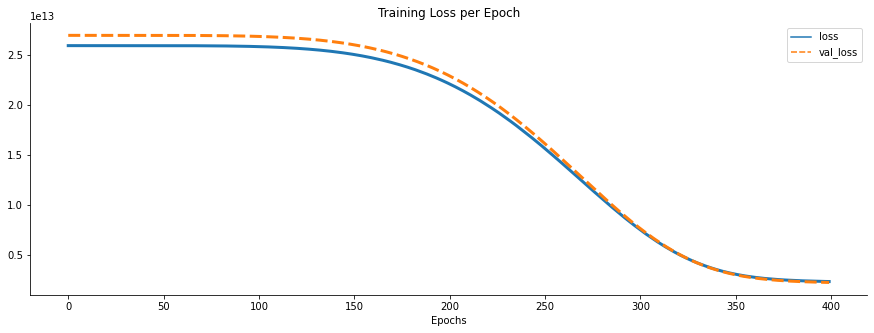

In [71]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [74]:
y_pred=model.predict(X_test)
y_pred = (y_pred >0.5)

6/6 [==============================] - 0s 5ms/step


In [75]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [76]:
accuracy_score(y_test, y_pred)

0.0

In [96]:
predictions = model.predict(X_test)
predictions

6/6 [==============================] - 0s 3ms/step


array([[5004833.5],
       [5027434.5],
       [4734662. ],
       [3534359.5],
       [4714716.5],
       [2658959.8],
       [5690232. ],
       [4101851.5],
       [5134305. ],
       [4825362.5],
       [5412928. ],
       [6771419.5],
       [4546854.5],
       [4070557.2],
       [6092697.5],
       [6486615.5],
       [4859091.5],
       [5309475. ],
       [3372318.8],
       [3695889. ],
       [4493292.5],
       [4461554.5],
       [5645329. ],
       [5024077.5],
       [4246048.5],
       [4063207. ],
       [2914461.5],
       [5287943. ],
       [3778642.5],
       [4614928. ],
       [3996386. ],
       [4197500.5],
       [5046389. ],
       [3754678.2],
       [6505216.5],
       [3494037.5],
       [4949391. ],
       [6855987.5],
       [4643753.5],
       [3549107.8],
       [4825412.5],
       [5854542.5],
       [5216428. ],
       [5212226. ],
       [3847652.2],
       [3596404. ],
       [5849690.5],
       [4197001.5],
       [5898047.5],
       [2826259.2],


In [86]:
y_test.shape

(164,)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

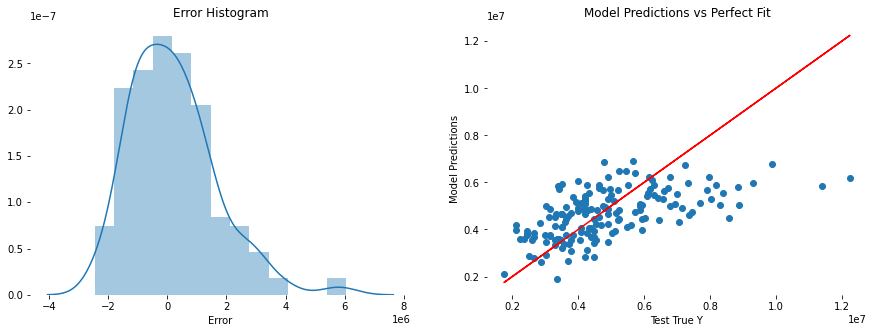

In [89]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(164, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [95]:
# fueatures of new house
single_house = df.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 14))

# run the model and get the price prediction
print('\nPrediction Price:',model.predict(single_house)[0,0])

# original price
print('\nOriginal Price:',df.iloc[0]['price'])

Features of new house:
Unnamed: 0            0
area               7420
bedrooms              4
bathrooms             2
stories               3
mainroad              1
guestroom             0
basement              0
hotwaterheating       0
airconditioning       1
parking               2
prefarea              1
semi-furnished        0
unfurnished           0
Name: 0, dtype: int64
1/1 [==============================] - 0s 47ms/step

Prediction Price: 5725188.5

Original Price: 13300000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
